# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [2]:
!pip install sklearn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [4]:
mall_df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/b403357c-9456-4e37-acbf-ac5e679a7039.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Ordinal Encoder de la colonne Gender**

In [5]:
mall_df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
enc = OrdinalEncoder()
mall_df[["Gender"]] = enc.fit_transform(mall_df[["Gender"]])
mall_df.Gender.value_counts()

0.0    112
1.0     88
Name: Gender, dtype: int64

**Femme = 0  
Homme = 1**

In [7]:
mall_df['Gender'].astype(int)

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

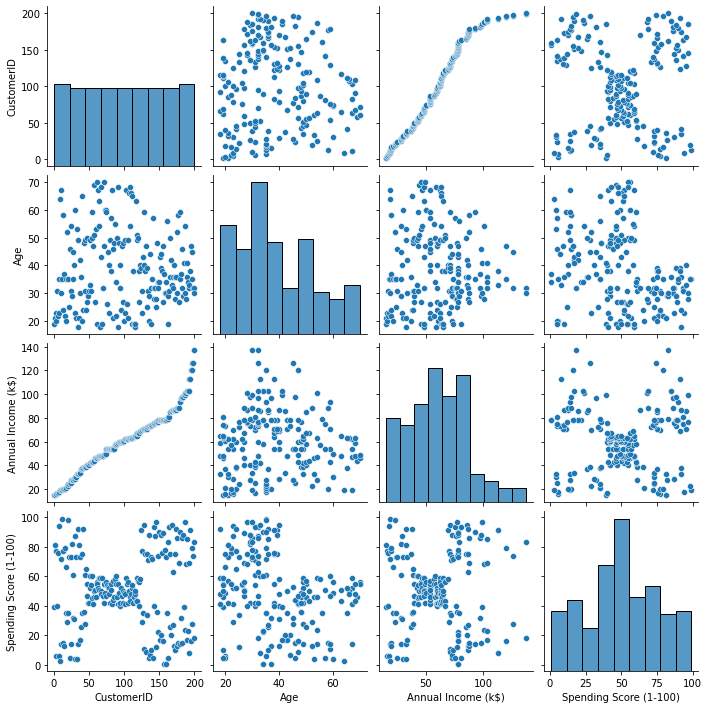

In [5]:
sns.pairplot(mall_df)

## KMEANS

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [9]:
kmean_df = mall_df.copy()

In [80]:
gm_df = mall_df.copy()

### Scale

**Standscaler sur spending**

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
kmean_df[["Spending Score (1-100)"]] = pd.DataFrame(ss.fit_transform(kmean_df[["Spending Score (1-100)"]]))
kmean_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1.0,19,15,-0.434801,3
1,2,1.0,21,15,1.195704,3
2,3,0.0,20,16,-1.715913,3
3,4,0.0,23,16,1.040418,3
4,5,0.0,31,17,-0.395980,3


**Minmax scaler sur age & income**

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
kmean_df[["Age","Annual Income (k$)"]] = pd.DataFrame(mms.fit_transform(kmean_df[["Age","Annual Income (k$)"]]))
kmean_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1.0,0.019231,0.000000,-0.434801,3
1,2,1.0,0.057692,0.000000,1.195704,3
2,3,0.0,0.038462,0.008197,-1.715913,3
3,4,0.0,0.096154,0.008197,1.040418,3
4,5,0.0,0.250000,0.016393,-0.395980,3


**KMeans**

In [64]:
sse = []
X = kmean_df.drop(["CustomerID","Gender"], axis=1)

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

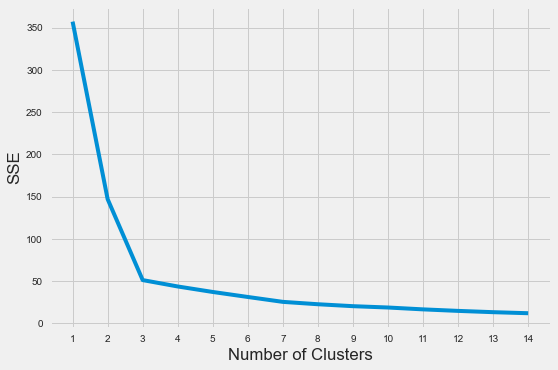

In [65]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

In [66]:
kl = KneeLocator(
    range(1, 15), sse, curve="convex", direction="decreasing")
kl.elbow

3

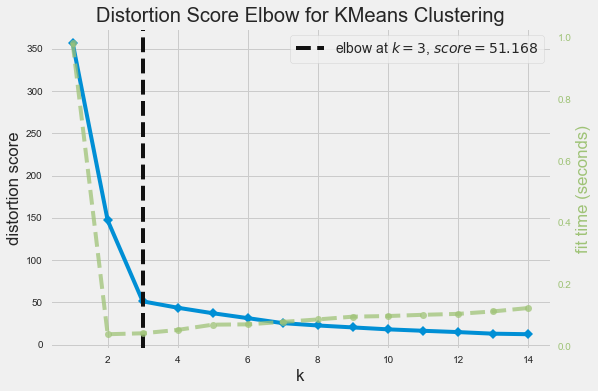

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [74]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [71]:
kmean_df['cluster'] = model.labels_

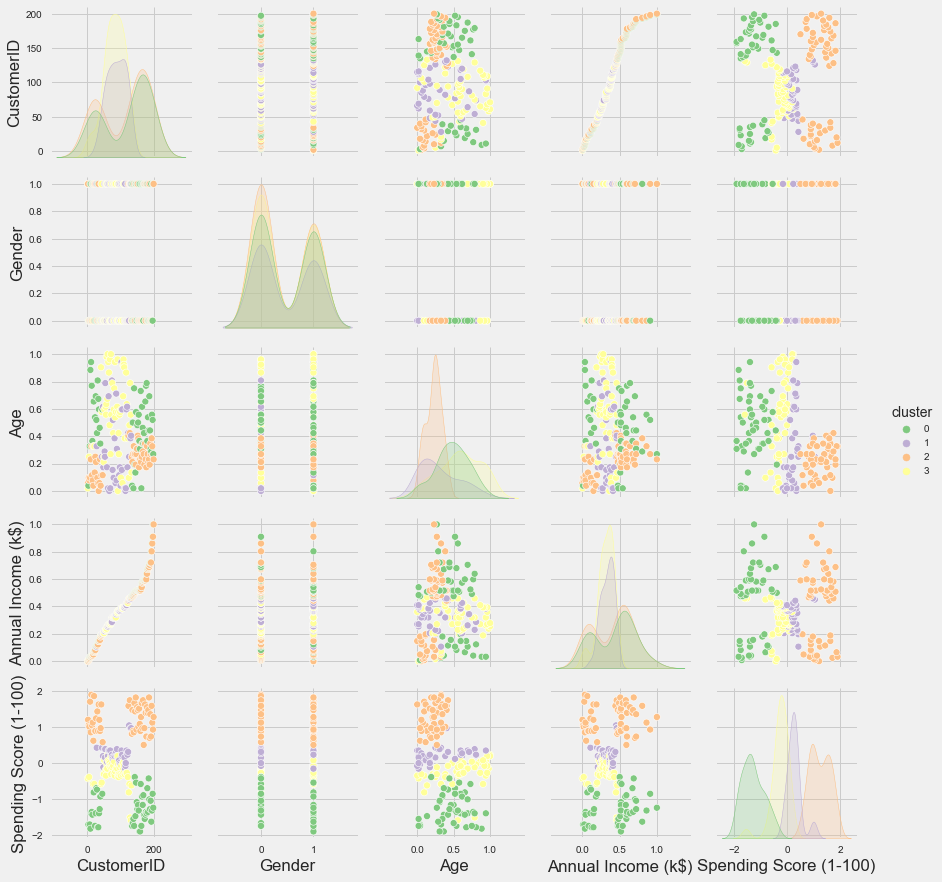

In [76]:
sns.pairplot(kmean_df, hue='cluster', palette="Accent")

In [ ]:
sns.swarmplot(kmean_df.cluster, kmean_df.Gender)

In [75]:
#Scoredesilhouette
from sklearn.metrics import silhouette_score
print(silhouette_score(X, model.labels_, metric='euclidean'))

0.6463683527924498


## Gaussian Mixture

In [62]:
from sklearn.mixture import GaussianMixture

In [95]:
gm = GaussianMixture(n_components=5, random_state=0).fit(X)

In [96]:
gm_df['cluster'] = gm.predict(X)

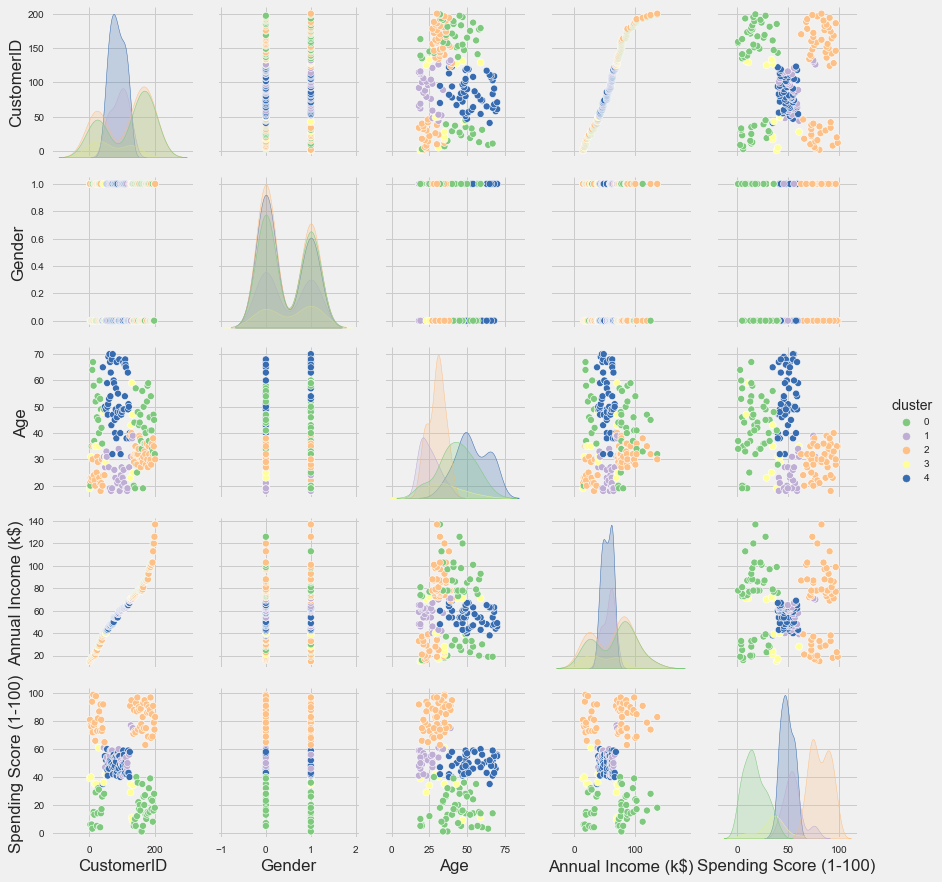

In [97]:
sns.pairplot(gm_df,hue="cluster", palette="Accent")

# Conclusions